# Fancy Indexing

In [1]:
import numpy as np

rng = np.random.default_rng(seed=1701)

In [2]:
x = rng.integers(100, size=10)
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [3]:
[x[3], x[7], x[2]]

[30, 15, 9]

In [4]:
idx = [3, 7, 4]
x[idx]

array([30, 15, 80], dtype=int64)

In [5]:
idx = np.array([[3, 7],
                [4, 5]])
x[idx]

array([[30, 15],
       [80, 67]], dtype=int64)

In [6]:
X = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

## Combined Indexing

In [9]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

In [13]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [14]:
np.mean(X, axis=0)

array([-0.02700141,  0.10792155])

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

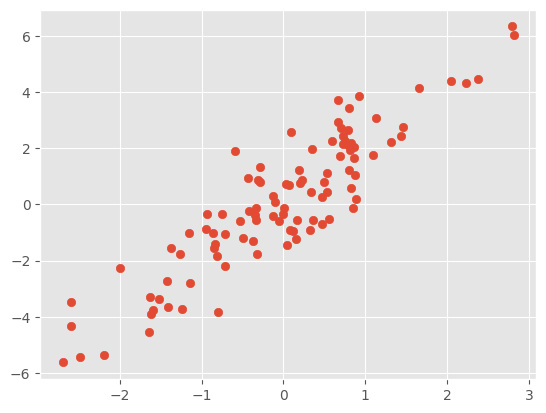

In [16]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [17]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([88, 18, 46, 60, 68, 10, 85, 82, 34, 75, 58, 12, 44, 26, 57, 49,  3,
       61, 79, 96])

In [18]:
selection = X[indices]
selection.shape

(20, 2)

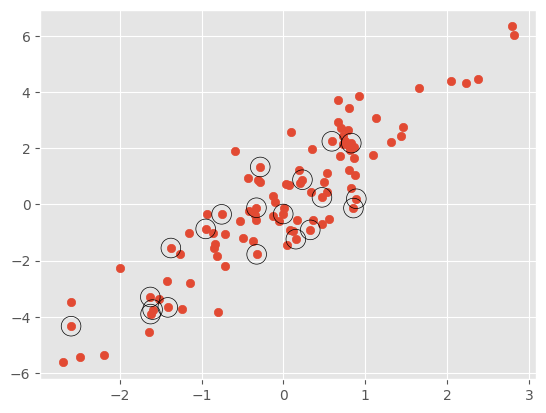

In [19]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(selection[:, 0], selection[:, 1], 
            facecolor='none', edgecolor='black', s=200)
plt.show()

## Modifying Values with Fancy Indexing

In [22]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [23]:
x[i] -= 10

In [25]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

This operation first assigns `x[0] = 4`, followed by `x[0] = 6`. The result, of course, is that `x[0]` contains the value 6.

In [29]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 2., 2., 2., 0., 0., 0., 0., 0.])

In [44]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
temp = x[i] + 1
print(temp) # [1. 1. 1. 1. 1. 1.]
x[i] = temp
x[i] # array([1., 1., 1., 1., 1., 1.])

[1. 1. 1. 1. 1. 1.]


array([1., 1., 1., 1., 1., 1.])

In [34]:
x[i] = temp

In [40]:
x = np.array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x # array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

## Example: Binning Data

In [51]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)

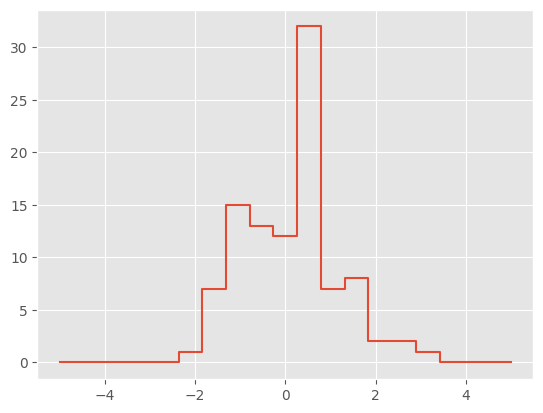

In [55]:
plt.plot(bins, counts, drawstyle='steps')
plt.show()

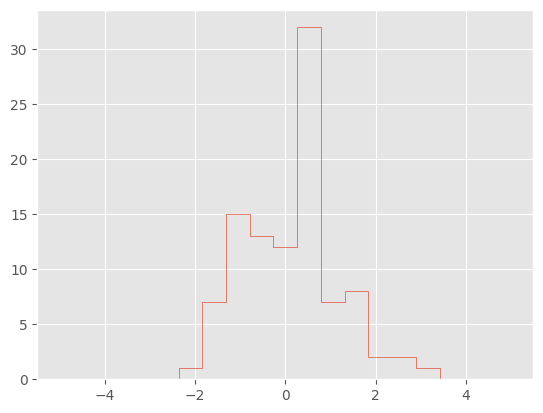

In [60]:
plt.hist(x, bins, histtype='step')
plt.show()

In [62]:
print('Numpy histogram ({} points):'.format(len(x)))
%timeit counts, edges = np.histogram(x, bins)

Numpy histogram (100 points):
20.6 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [64]:
print('Custom histogram ({} points):'.format(len(x)))
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom histogram (100 points):
12.2 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [65]:
x = rng.normal(size=1_000_000)
print('Numpy histogram ({} points):'.format(len(x)))
%timeit counts, edges = np.histogram(x, bins)

Numpy histogram (1000000 points):
49.1 ms ± 719 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
print('Custom histogram ({} points):'.format(len(x)))
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom histogram (1000000 points):
89.2 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
